## Numpy의 polyfit으로 회귀(regression) 분석하기

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('./PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)

pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


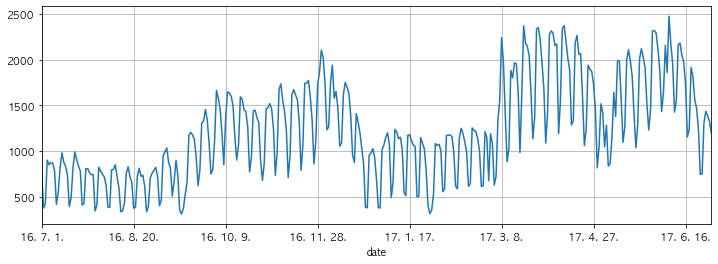

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [5]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.47773021321143


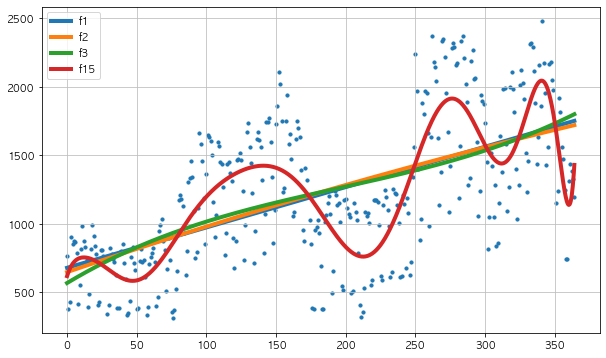

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

## Prophet 모듈을 이용한 forecast 예측

In [9]:
pd.plotting.register_matplotlib_converters()

df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,924.007252,696.621050,1138.391755
421,2017-08-26,509.019918,290.408927,710.574487
422,2017-08-27,641.503999,439.425842,849.980148
423,2017-08-28,1194.071095,968.565643,1416.690343
424,2017-08-29,1229.894880,1024.037775,1446.509614


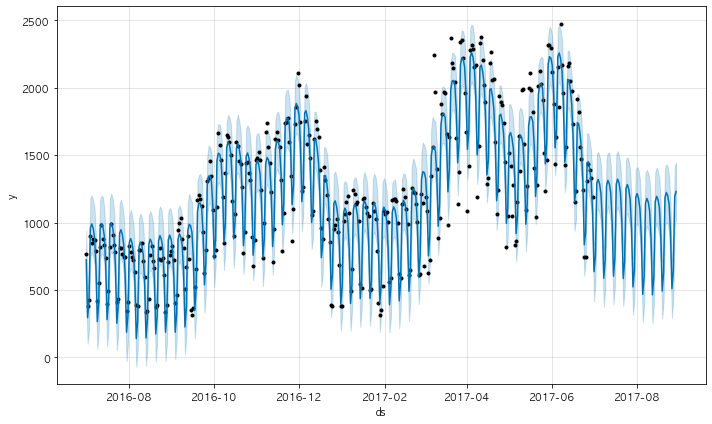

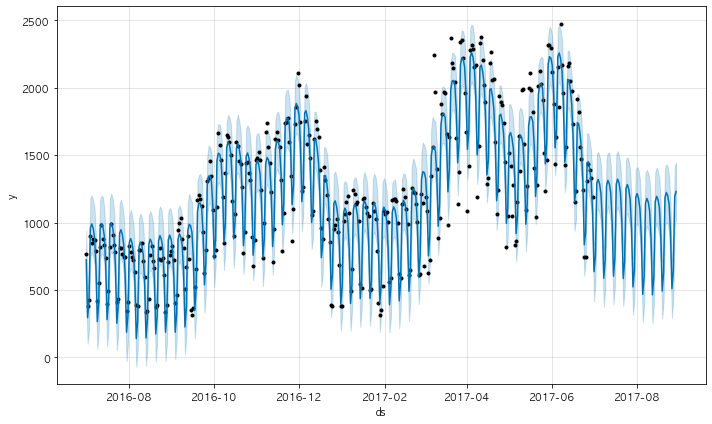

In [12]:
m.plot(forecast)

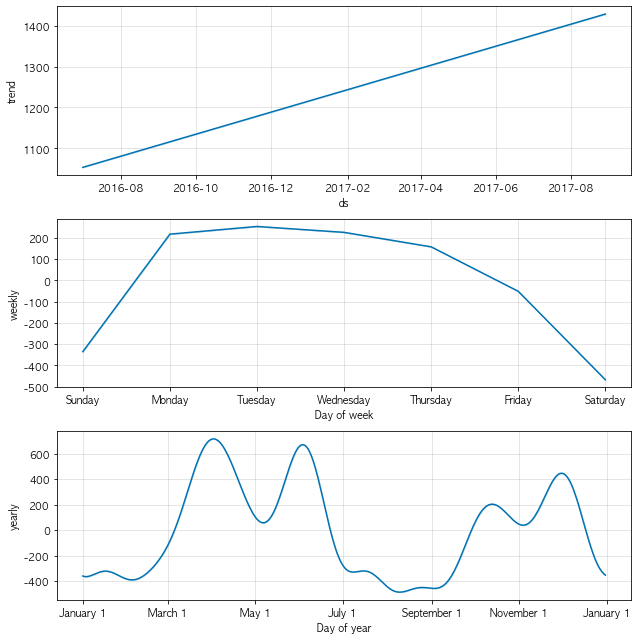

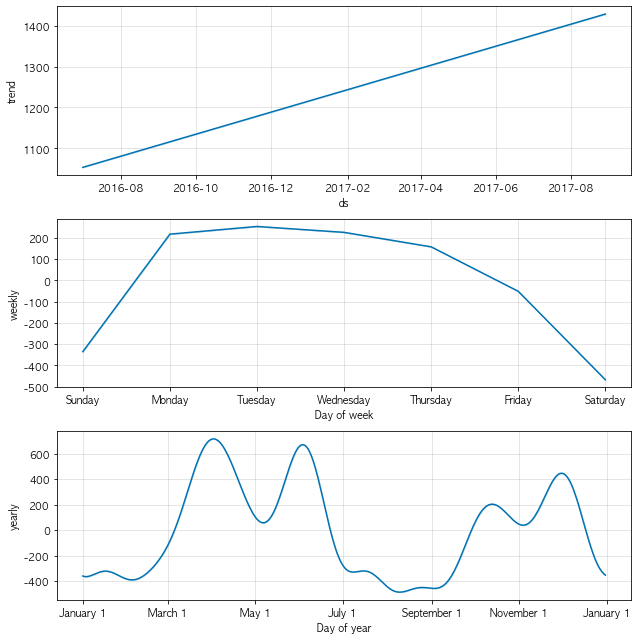

In [13]:
m.plot_components(forecast)

## Seasonal 시계열 분석으로 주식 데이터 분석하기

In [21]:
from pandas_datareader import data

import yfinance as yf
yf.pdr_override()

KIA = data.get_data_yahoo('000270.KS')
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-05,41500.0,41950.0,41000.0,41650.0,41650.0,1528001
2019-06-07,42450.0,42950.0,40750.0,41150.0,41150.0,1814285
2019-06-10,42950.0,43000.0,42250.0,43000.0,43000.0,1357541
2019-06-11,42850.0,43000.0,42150.0,42800.0,42800.0,1122282
2019-06-12,42800.0,43200.0,42600.0,42800.0,42800.0,836853


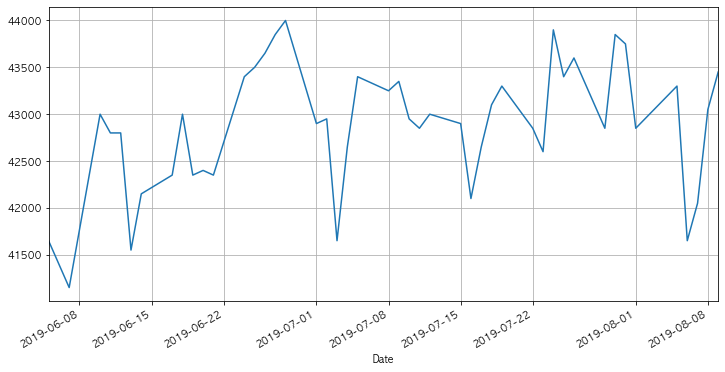

In [23]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [48]:
KIA_trunc = KIA[:-5]
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-05,41500.0,41950.0,41000.0,41650.0,41650.0,1528001
2019-06-07,42450.0,42950.0,40750.0,41150.0,41150.0,1814285
2019-06-10,42950.0,43000.0,42250.0,43000.0,43000.0,1357541
2019-06-11,42850.0,43000.0,42150.0,42800.0,42800.0,1122282
2019-06-12,42800.0,43200.0,42600.0,42800.0,42800.0,836853
2019-06-13,42850.0,43000.0,41550.0,41550.0,41550.0,1376583
2019-06-14,41600.0,43050.0,41250.0,42150.0,42150.0,848964
2019-06-17,42300.0,42900.0,42100.0,42350.0,42350.0,506394
2019-06-18,42550.0,43000.0,42250.0,43000.0,43000.0,888327


In [49]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})
df.reset_index(inplace=True)

del df['Date']
df.head()

,ds,y
0,2019-06-05,41650.0
1,2019-06-07,41150.0
2,2019-06-10,43000.0
3,2019-06-11,42800.0
4,2019-06-12,42800.0


In [50]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
136,2019-11-05
137,2019-11-06
138,2019-11-07
139,2019-11-08
140,2019-11-09


In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
136,2019-11-05,45860.118452,43041.063855,48714.730389
137,2019-11-06,45780.443548,42927.502798,48733.117420
138,2019-11-07,45670.891283,42688.405036,48725.858918
139,2019-11-08,45894.298733,42904.203798,48932.913860
140,2019-11-09,-19178.349665,-22184.892152,-15956.155364


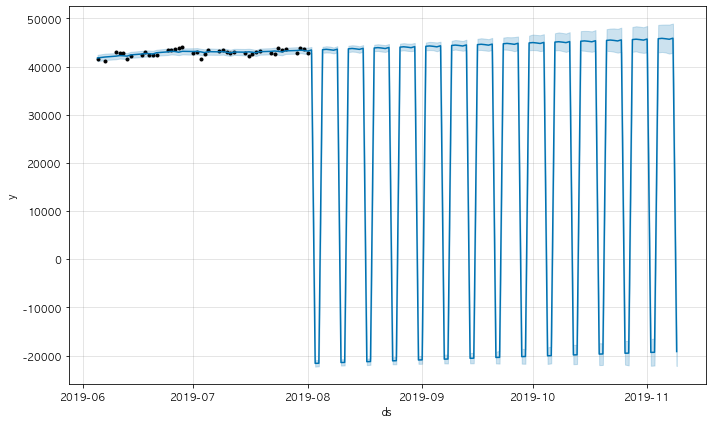

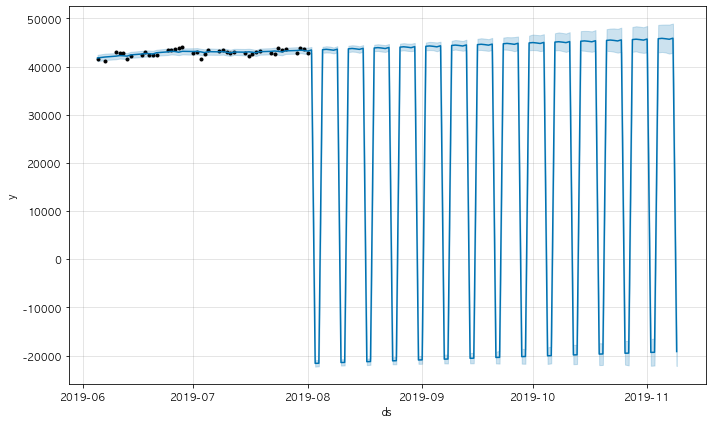

In [61]:
m.plot(forecast)

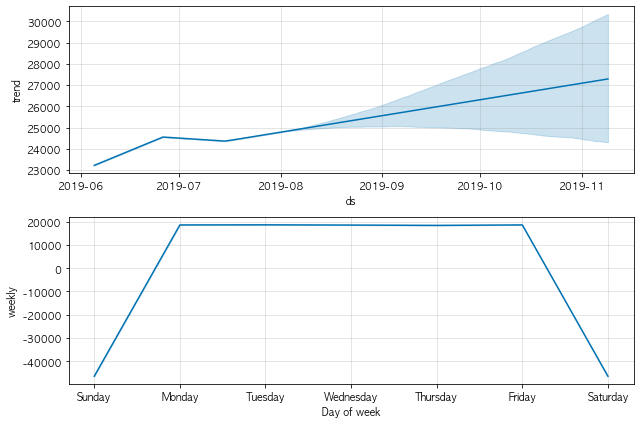

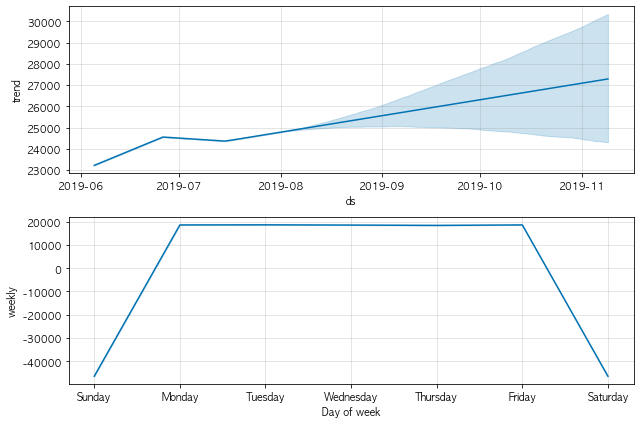

In [62]:
m.plot_components(forecast)

[*********************100%***********************]  1 of 1 downloaded


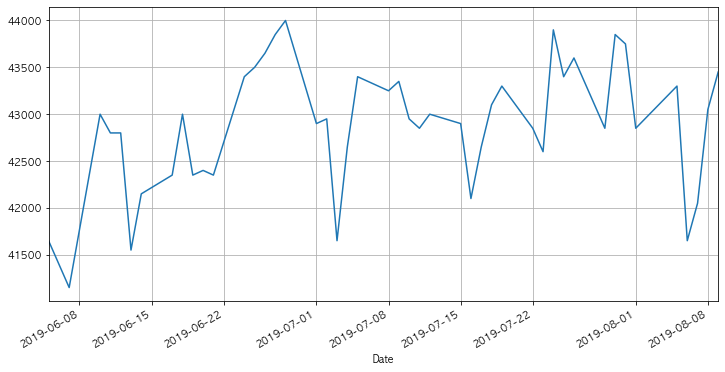

In [64]:
KIA = data.get_data_yahoo('000270.KS')
KIA['Close'].plot(figsize=(12,6), grid=True)

In [65]:
df = pd.DataFrame({'ds': KIA_trunc.index, 'y': KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [66]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
97,2019-09-27
98,2019-09-28
99,2019-09-29
100,2019-09-30
101,2019-10-01


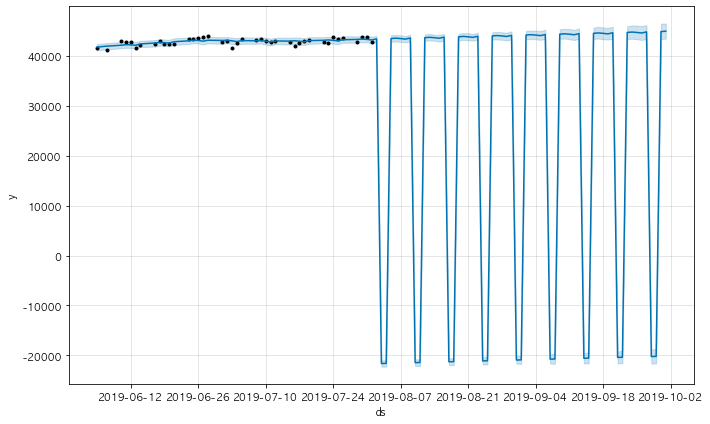

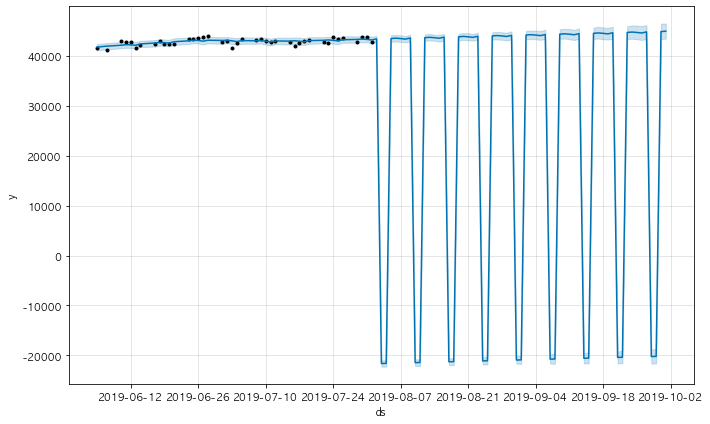

In [69]:
forecast = m.predict(future)
m.plot(forecast)

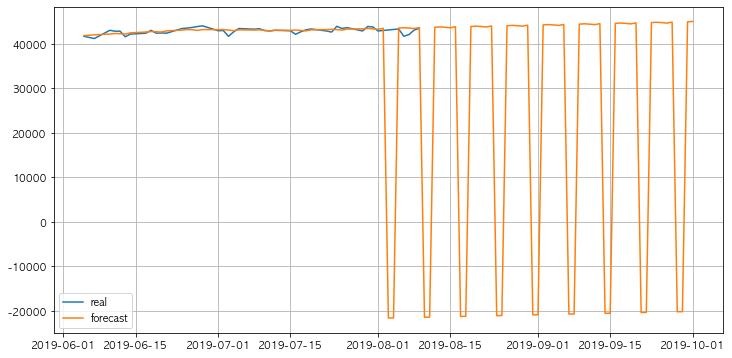

In [71]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## Growth Model과 Holiday Forecast

In [72]:
df = pd.read_csv('./example_wp_R.csv')
df['y'] = np.log(df['y'])

In [73]:
df['cap'] = 8.5

In [74]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


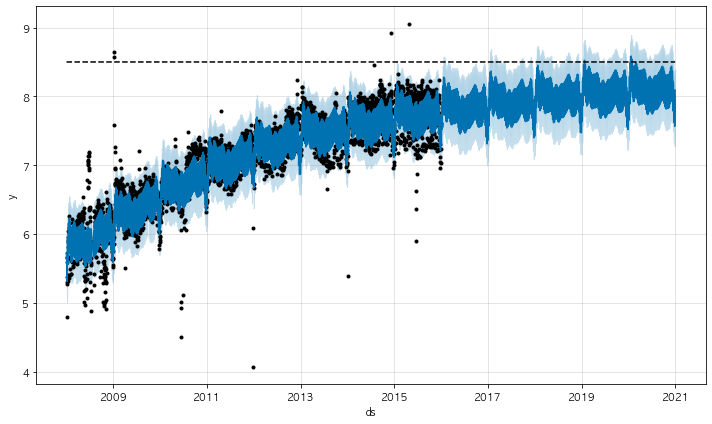

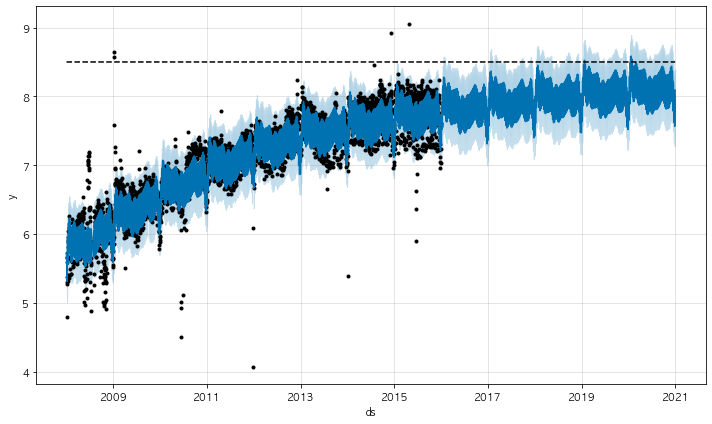

In [75]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

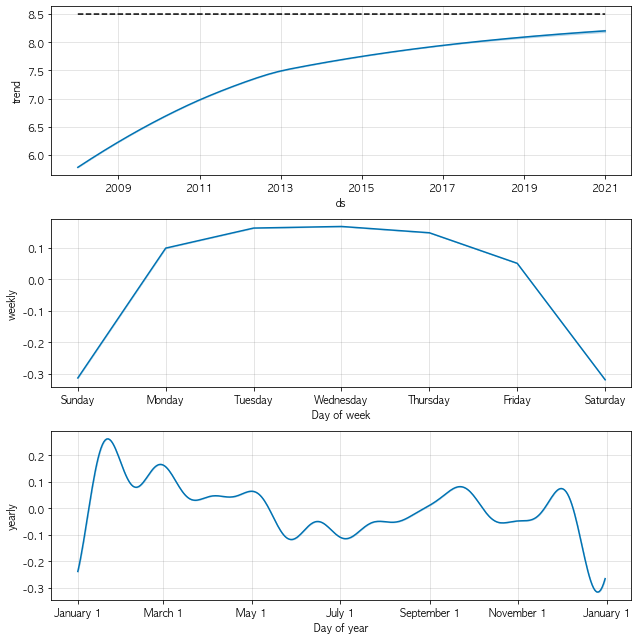

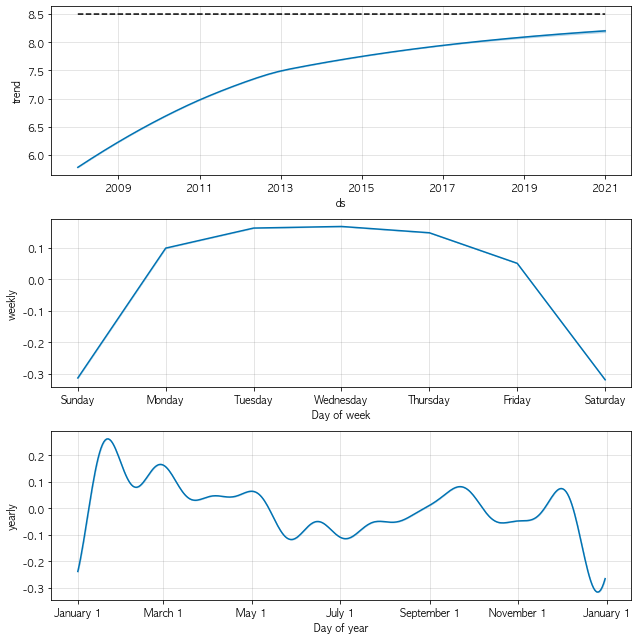

In [76]:
forecast = m.predict(future)
m.plot_components(forecast)